# Tracking Near-Earth Objects (NEOs): Exploratory Data Analysis

## Data Collection: 
For this project, I obtained a dataset from NASA that provides detailed information about the NEOs and their approximate distance from Earth. The data is extracted via the NASA API for the month of January 2023. Due to the API's 7 days data fetch limit, the data is collected in 4 separate chunks, each corresponding to 7-day period in the month of January 2023. These chunks are then, merged to form a complete dataset for the entire month of January.

Source: NASA Asteroids NeoWs (Near Earth Object Web Service)
Time Period: January 2023

In [219]:
import requests  # Import the requests module to make HTTP requests
import json      # Import the json module to handle JSON data
import pandas as pd
# NASA API Key
api_key = '43CeF9mMNkbz8M1IhqOEYi3ici40QBdXXT2IXwMX'

# Function to make a request to the NASA API and fetch the data
def get_nasa_data(start_date, end_date, api_key):
    try:
        # Base URL for NASA's API
        base_url = "https://api.nasa.gov/neo/rest/v1/feed"
        # Make the GET request to the NASA API with the specified parameters (date range and API key)
        request = requests.get(base_url, params={'start_date': start_date, 'end_date': end_date, 'api_key': api_key})

        # Check if the request was successful (status code 200)
        if request.status_code == 200:
            # Print response to verify data
            print(f"fetched data for {start_date} to {end_date}")
            return request.json()  # Return the data as JSON
        else:
            print(f"data wasn't fetched for {start_date} to {end_date}, Status Code: {request.status_code}")
            return None
    except:
        print(f"An error occurred")
        return None

In [220]:
date_ranges = [
    ("2023-01-01", "2023-01-07"),
    ("2023-01-08", "2023-01-14"),
    ("2023-01-15", "2023-01-21"),
    ("2023-01-22", "2023-01-28")
]

# Initialize an empty list to hold the combined data for all 4 weeks
neo_data = []

# Loop through each date range, fetch the data and append it to the list
for start_date, end_date in date_ranges:
    data = get_nasa_data(start_date, end_date, api_key)
    if data:
        neo_data.append(data)  # Append data if fetched successfully
    else:
        print(f"No data found for {start_date} to {end_date}")

# Check if neo_data is not empty and then turn it into dataframe using pandas library
if neo_data:
    neo_df = pd.DataFrame(neo_data)
else:
    print("No data was retrieved for the given date ranges.")


print(neo_df)
neo_df.head()
print(neo_df['near_earth_objects'])


fetched data for 2023-01-01 to 2023-01-07
fetched data for 2023-01-08 to 2023-01-14
fetched data for 2023-01-15 to 2023-01-21
fetched data for 2023-01-22 to 2023-01-28
                                               links  element_count  \
0  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            115   
1  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            122   
2  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            108   
3  {'next': 'http://api.nasa.gov/neo/rest/v1/feed...            133   

                                  near_earth_objects  
0  {'2023-01-01': [{'links': {'self': 'http://api...  
1  {'2023-01-11': [{'links': {'self': 'http://api...  
2  {'2023-01-20': [{'links': {'self': 'http://api...  
3  {'2023-01-22': [{'links': {'self': 'http://api...  
0    {'2023-01-01': [{'links': {'self': 'http://api...
1    {'2023-01-11': [{'links': {'self': 'http://api...
2    {'2023-01-20': [{'links': {'self': 'http://api...
3    {'2023-01-22': [{'links': {'sel

## Data Extraction and Transformation for NEOs
Now that, I have extracted the data from the NASA API and collected all the 4 weeks of data, I will tranform the raw JSON data into a structured format using Python's `pandas` library. The goal is to extract the key details about the NEOs (Near Earth Objects) and use them as variables.
The key variables chosen here are:
1. `id`: a unique identifier for each NEO
2. `name`: the name of the NEO
3. `absolute_magnitude_h`: the brightness of the NEO, which is an indicator of its size and reflectivity. The absolute magnitude H is a measure of the asteroid’s intrinsic mean brightness, estimated from measurements of its apparent magnitudes at the various times it has been observed, at various distances from the Sun and Earth, and at various phase angles. Also, since the actual shape of the asteroid is usually unknown, it is simply assumed to be spherical.
4. `estimated_diameter_min_km` & `estimated_diameter_max_km`: the minimun and maximum diameter of the NEO in kilometers.
5. `is_potentially_hazardous_asteroid`: 
6. `close_approach_data`:
7. `is_sentry_object`:

In [221]:
"""
extract the 'near_earth_objects' data to form the dataframe
"""

#initialize the neo_df as empty list to store the new data
df =[]

# create a loop through the NEO data
for each_week in neo_df['near_earth_objects']:
    for date, objects in each_week.items():
        for neo in objects:
            df.append({
                'Date': date, 'ID': neo['id'], 'Name': neo['name'], 'Abs_magnitude': neo['absolute_magnitude_h'], 'Min_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Max_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_max'], 'Potential_hazard': neo['is_potentially_hazardous_asteroid'], 
                'Close_approach_date': neo['close_approach_data'][0]['close_approach_date'], 'Relative_velocity': neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second'], 
                'Miss_distance': neo['close_approach_data'][0]['miss_distance']['astronomical'], 'Orbiting_body': neo['close_approach_data'][0]['orbiting_body'], 
                'Sentry_object': neo['is_sentry_object']
            })

df = pd.DataFrame(df)
print(df.head())


         Date       ID               Name  Abs_magnitude  Min_diameter  \
0  2023-01-01  2154347  154347 (2002 XK4)          16.08      1.616423   
1  2023-01-01  2385186  385186 (1994 AW1)          17.64      0.788052   
2  2023-01-01  2453309  453309 (2008 VQ4)          19.51      0.333085   
3  2023-01-01  3683468       (2014 QR295)          18.39      0.557898   
4  2023-01-01  3703782        (2015 AE45)          25.30      0.023150   

   Max_diameter  Potential_hazard Close_approach_date Relative_velocity  \
0      3.614431             False          2023-01-01     27.3921993676   
1      1.762138              True          2023-01-01     12.9241938417   
2      0.744801             False          2023-01-01       5.822172435   
3      1.247498             False          2023-01-01     16.1804693508   
4      0.051765             False          2023-01-01      6.8621510862   

  Miss_distance Orbiting_body  Sentry_object  
0  0.3312263376         Earth          False  
1  0.22328

## Data Preparation and Cleaning

### Handling the missing values 
Once we have converted the data into a dataframe, next we check for any missing values and the ways to address the issue.
Since, there are no missing values in the dataset, we can move ahead to other aspects of the data preparation.

In [222]:
# checking for any missing values in the dataframe
df.isnull().sum()

Date                   0
ID                     0
Name                   0
Abs_magnitude          0
Min_diameter           0
Max_diameter           0
Potential_hazard       0
Close_approach_date    0
Relative_velocity      0
Miss_distance          0
Orbiting_body          0
Sentry_object          0
dtype: int64

### Enriching the data 
To enrich the dataset by performing the following steps:
- Parsing Dates: The dates columns - `Date` and `Close_approach_date` are currently stored as strings. Now, we'll convert it into `datetime` object for better analysis.
- Extracting Data Features: The following are the additional features that we are adding into the dataframe-
    1. Average Diameter: `Average_diameter`
    2. Relative Velocity (in km/s): `Relative_velocity_km_s`

### Parsing Dates
To convert `Date` and `Close_approach_date` columns into `datetime` format, we use `pd.to_datetime()

In [223]:
import datetime 

df['Date'] = pd.to_datetime(df['Date'])
df['Close_approach_date'] = pd.to_datetime(df['Close_approach_date'])

### Data Feature Engineering
In this step, we create new features to further enhance our analysis. The following features are derived from the existing columns and provide more details about the NEOs.
1. Average Diameter (in km) - this feature is the average of the minimum diameter and the maximum diameter of a specific NEO. The feature simplies the diameter range into a single value, making it easier for visualization and analysis.
2. Relative Velocity (in km/s): this feature represents the relative velocity in kilometer/second. Doing so is essential since it is the standard unit for measuring speed in space and makes it easier to interpret the results.

In [224]:
# average diameter (in kilometer)
df['Average_diameter'] = (df['Max_diameter'] + df['Min_diameter'])/2

# relative velocity (in km/s)
df['Relative_velocity'] = pd.to_numeric(df['Relative_velocity'])
df['Relative_velocity_km_s'] = df['Relative_velocity'] / 3600

In [225]:
df.head()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Average_diameter,Relative_velocity_km_s
0,2023-01-01,2154347,154347 (2002 XK4),16.08,1.616423,3.614431,False,2023-01-01,27.392199,0.3312263376,Earth,False,2.615427,0.007609
1,2023-01-01,2385186,385186 (1994 AW1),17.64,0.788052,1.762138,True,2023-01-01,12.924194,0.2232885314,Earth,False,1.275095,0.003590
2,2023-01-01,2453309,453309 (2008 VQ4),19.51,0.333085,0.744801,False,2023-01-01,5.822172,0.2644821197,Earth,False,0.538943,0.001617
3,2023-01-01,3683468,(2014 QR295),18.39,0.557898,1.247498,False,2023-01-01,16.180469,0.2629103243,Earth,False,0.902698,0.004495
4,2023-01-01,3703782,(2015 AE45),25.30,0.023150,0.051765,False,2023-01-01,6.862151,0.0569979859,Earth,False,0.037458,0.001906


In [226]:
df.tail()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Average_diameter,Relative_velocity_km_s
473,2023-01-28,54339182,(2023 BC),24.94,0.027325,0.061100,False,2023-01-28,12.793388,0.0188873982,Earth,False,0.044212,0.003554
474,2023-01-28,54339967,(2023 BD2),24.40,0.035039,0.078350,False,2023-01-28,10.388105,0.1470858282,Earth,False,0.056695,0.002886
475,2023-01-28,54340318,(2023 BE7),26.61,0.012664,0.028317,False,2023-01-28,14.744039,0.0054463529,Earth,False,0.020490,0.004096
476,2023-01-28,54340319,(2023 BG7),27.73,0.007561,0.016906,False,2023-01-28,18.145609,0.0027252951,Earth,False,0.012233,0.005040
477,2023-01-28,54353683,(2023 FE14),21.00,0.167708,0.375008,False,2023-01-28,13.496939,0.3807189018,Earth,False,0.271358,0.003749


### Perform Exploratory Analysis
Exploring the data by taking a look at the data structure, descriptive statistics, distributions of the columns and the relationship between columns.

In [227]:
print(df.shape)

(478, 14)


**Interpretation**
We can see that the dataset has 478 rows and 14 columns.

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    478 non-null    datetime64[ns]
 1   ID                      478 non-null    object        
 2   Name                    478 non-null    object        
 3   Abs_magnitude           478 non-null    float64       
 4   Min_diameter            478 non-null    float64       
 5   Max_diameter            478 non-null    float64       
 6   Potential_hazard        478 non-null    bool          
 7   Close_approach_date     478 non-null    datetime64[ns]
 8   Relative_velocity       478 non-null    float64       
 9   Miss_distance           478 non-null    object        
 10  Orbiting_body           478 non-null    object        
 11  Sentry_object           478 non-null    bool          
 12  Average_diameter        478 non-null    float64   

**Interpretation**
We can see the data types of all the columns as well as the features engineered by us.
The column `Miss_distance` and `Orbiting_body` have the data type as object. We need to convert them into float and string data types respectively.

In [229]:
df['Miss_distance'] = df['Miss_distance'].astype(float)
df['Orbiting_body'] = df['Orbiting_body'].astype(str)

Dropping Unneccessary Columns

In [230]:
new_df = df.drop(['Name', 'Min_diameter', 'Max_diameter', 'Relative_velocity', 'Date'], axis = 1)
new_df.head()

,ID,Abs_magnitude,Potential_hazard,Close_approach_date,Miss_distance,Orbiting_body,Sentry_object,Average_diameter,Relative_velocity_km_s
0,2154347,16.08,False,2023-01-01,0.331226,Earth,False,2.615427,0.007609
1,2385186,17.64,True,2023-01-01,0.223289,Earth,False,1.275095,0.003590
2,2453309,19.51,False,2023-01-01,0.264482,Earth,False,0.538943,0.001617
3,3683468,18.39,False,2023-01-01,0.262910,Earth,False,0.902698,0.004495
4,3703782,25.30,False,2023-01-01,0.056998,Earth,False,0.037458,0.001906


In [231]:
new_df.describe()

,Abs_magnitude,Close_approach_date,Miss_distance,Average_diameter,Relative_velocity_km_s
count,478.000000,478,478.000000,478.000000,478.000000
mean,23.981789,2023-01-14 18:04:31.129707008,0.222191,0.194088,0.003600
min,13.510000,2023-01-01 00:00:00,0.000067,0.002475,0.000543
25%,22.010000,2023-01-08 00:00:00,0.072256,0.026065,0.002250
50%,24.340000,2023-01-15 00:00:00,0.222574,0.058283,0.003318
75%,26.087500,2023-01-22 00:00:00,0.355495,0.170450,0.004624
max,31.200000,2023-01-28 00:00:00,0.498955,8.541667,0.009947
std,2.876965,NaN,0.155675,0.538163,0.001786


**Interpretation**

`Abs_magnitude`: 
- The range is from 13.5(brightest) to 31.2(dimmest). 
- The median is 24.34 which means that most objects are relatively dim.
- The variation is 2.87 which means that the data has moderate variation.

`Miss_distance`:
- The range is from 0.000067 AU (~10.000km, which is exceptionally close) to 0.498 AU.
- 


`Average_diameter`
- The 

### Distribution Analysis 

<Figure size 400x400 with 0 Axes>

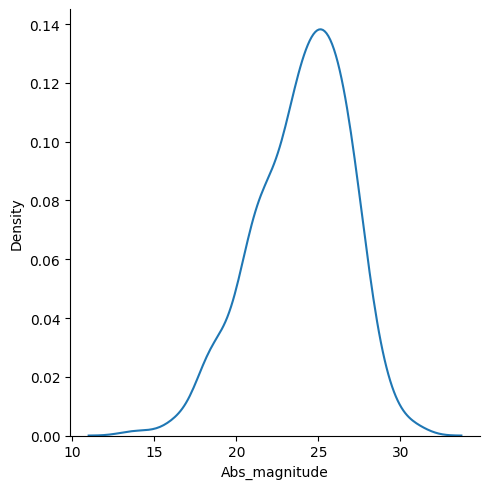

<Figure size 400x400 with 0 Axes>

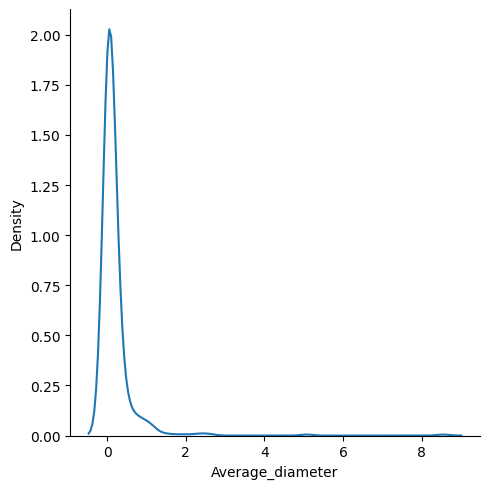

<Figure size 400x400 with 0 Axes>

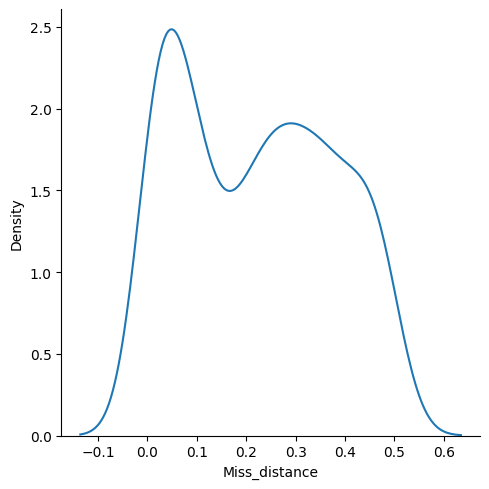

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(4, 4))
histogram = sns.displot(
    new_df['Abs_magnitude'],
    kind='kde'
)
plt.show()
plt.figure(figsize=(4, 4))
histogram = sns.displot(
    new_df['Average_diameter'], kind='kde'
)

plt.figure(figsize=(4, 4))
histogram = sns.displot(
    new_df['Miss_distance'], kind='kde'
)


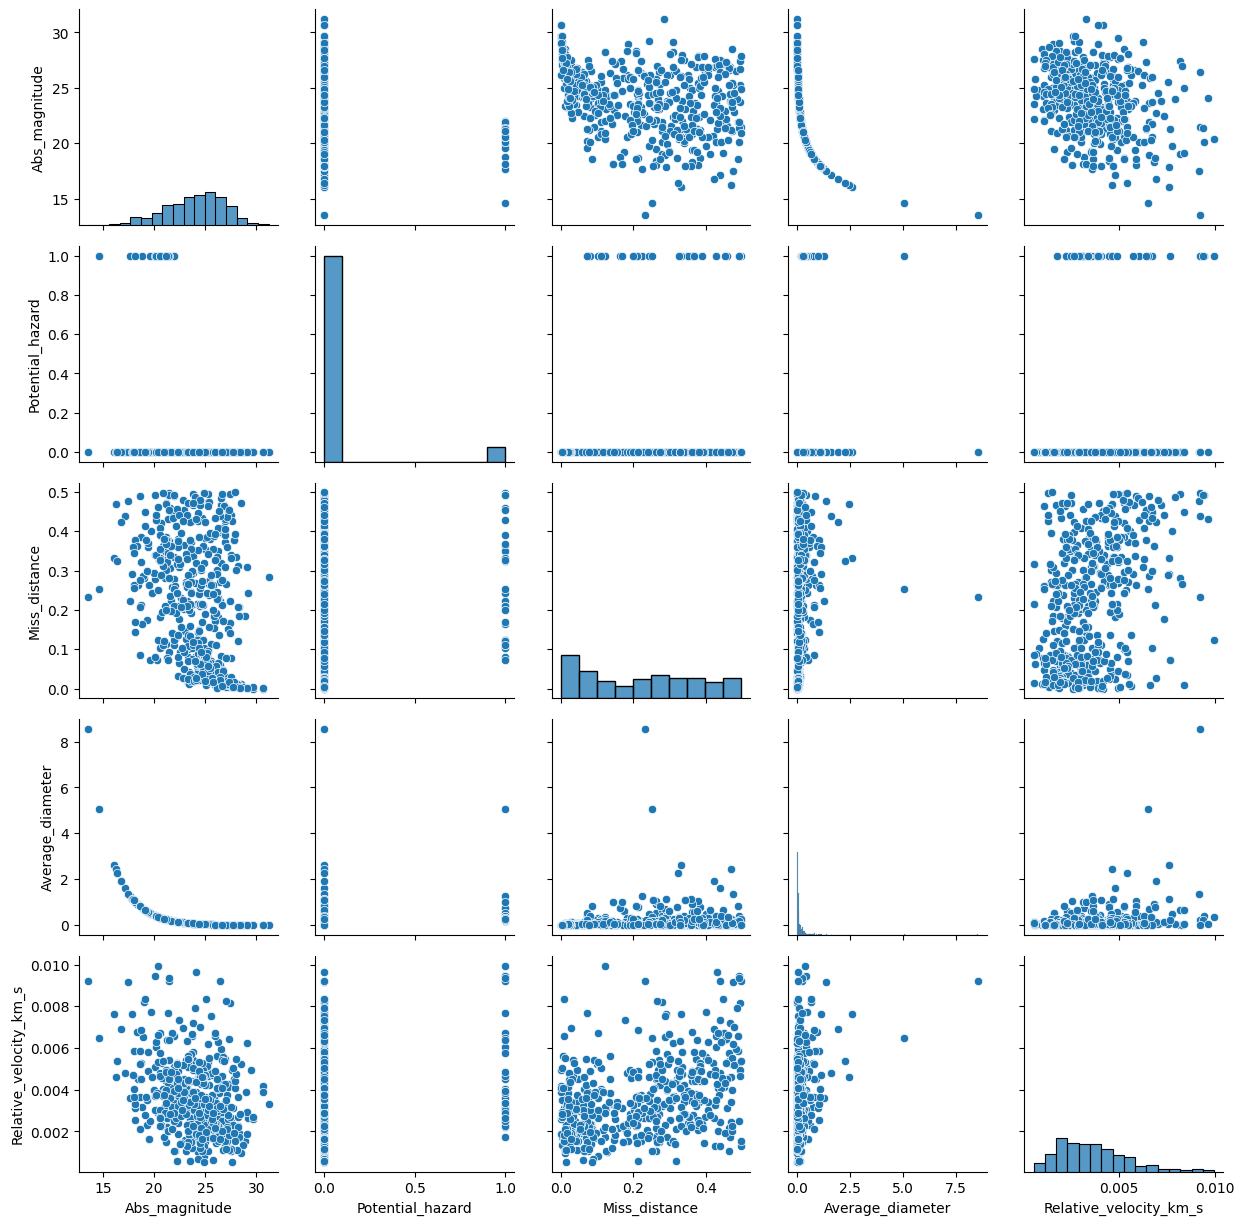

In [204]:
g = sns.PairGrid(new_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Identify the outliers and handle them

Text(0, 0.5, 'Diameter in 10^3 m')

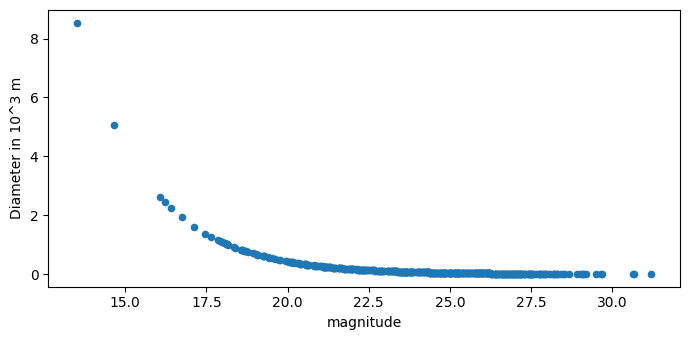

In [234]:
plot1 = new_df.plot.scatter(x='Abs_magnitude', y='Average_diameter')
plot1.set_xlabel("magnitude")
plot1.set_ylabel("Diameter in 10^3 m")

In [238]:
new_df[['Relative_velocity_km_s', 'Abs_magnitude', 'Average_diameter']].corr()

,Relative_velocity_km_s,Abs_magnitude,Average_diameter
Relative_velocity_km_s,1.000000,-0.344041,0.296684
Abs_magnitude,-0.344041,1.000000,-0.595762
Average_diameter,0.296684,-0.595762,1.000000


In [240]:
from scipy.stats import ttest_ind
hazardous = new_df[new_df['Potential_hazard']]['Relative_velocity_km_s']
non_hazardous = new_df[~new_df['Potential_hazard']]['Relative_velocity_km_s']
print(ttest_ind(hazardous, non_hazardous))


TtestResult(statistic=3.617714527293838, pvalue=0.00032899723052922893, df=476.0)
